####Importing the required libraries

In [58]:
# importing required libraries
import pickle
import pandas as pd
import numpy as np

In [59]:
# importing required libraries and storing stopwords of english in stopword variable
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stopword = stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##1. Preprocessing the dataset

In [60]:
#Loading the trainset and displaying it
trainset = pd.read_csv("/content/drive/MyDrive/IR/Assignment2/BBC News Train.csv")
trainset

ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3              tech  
4          business  
...             ...  
1485  entertainment  
1486  entertainment  
1487       business  
1488           tech  
1489           tech  

[1490 rows x 3 columns]

In [61]:
# removing the unnecessary columns and display the dataset 
trainset.drop('ArticleId',axis=1,inplace=True)
trainset.head()

Text  Category
0  worldcom ex-boss launches defence lawyers defe...  business
1  german business confidence slides german busin...  business
2  bbc poll indicates economic gloom citizens in ...  business
3  lifestyle  governs mobile choice  faster  bett...      tech
4  enron bosses in $168m payout eighteen former e...  business

In [62]:
print(trainset.shape)    # displaying the shape of the dataset

(1490, 2)


In [63]:
trainset.isnull().sum()     # checking the null count in all the columns

Text        0
Category    0
dtype: int64

In [64]:
trainset.iloc[1]['Text']    # displaying the content from the train dataset 1st row 'Text' column

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.

In [65]:
# Preprocessing the given dataset by removing punctuations,converting all the characters into lower,
# doing tokenization and removing the stopwords, performing the stemming and making a list. Finally return the list to the calling function.
def preprocess(row):
  text = row[0]
  text = re.sub(r'[^\w\s]','',text)
  text = text.lower()
  text = nltk.word_tokenize(text)
  text = [s_word for s_word in text if s_word not in stopword]
  ps = PorterStemmer()
  text = [ps.stem(word) for word in text]
  return text

In [66]:
trainset['updated_text'] = trainset.apply(preprocess, axis=1)     # adding the new column to the trainset by updating the 'Text' column data 

In [67]:
trainset.iloc[1]['updated_text']        # displaying the content from the train dataset 1st row 'Text' column after preprocessing is done

['german',
 'busi',
 'confid',
 'slide',
 'german',
 'busi',
 'confid',
 'fell',
 'februari',
 'knock',
 'hope',
 'speedi',
 'recoveri',
 'europ',
 'largest',
 'economi',
 'munichbas',
 'research',
 'institut',
 'ifo',
 'said',
 'confid',
 'index',
 'fell',
 '955',
 'februari',
 '975',
 'januari',
 'first',
 'declin',
 'three',
 'month',
 'studi',
 'found',
 'outlook',
 'manufactur',
 'retail',
 'sector',
 'worsen',
 'observ',
 'hope',
 'confid',
 'busi',
 'sector',
 'would',
 'signal',
 'econom',
 'activ',
 'pick',
 'surpris',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidenstein',
 'main',
 'reason',
 'probabl',
 'domest',
 'economi',
 'still',
 'weak',
 'particularli',
 'retail',
 'trade',
 'economi',
 'labour',
 'minist',
 'wolfgang',
 'clement',
 'call',
 'dip',
 'februari',
 'ifo',
 'confid',
 'figur',
 'mild',
 'declin',
 'said',
 'despit',
 'retreat',
 'index',
 'remain',
 'rel',
 'high',
 'level',
 'expect',
 'modest',
 'econom',


In [68]:
categories = set(trainset['Category'])        # storing and displaying the different categories
categories

{'business', 'entertainment', 'politics', 'sport', 'tech'}

###Implement the TF-ICF weighting scheme

####TF

In [69]:
# term_frequency is a dictionary. The keys are different categories and the values are another dictionary where the keys in that dictionary are words belonging to that category and values are count of that word in that category  
term_frequency = {}
for category in categories:
  term_frequency[category] = {}
print(term_frequency)

{'sport': {}, 'entertainment': {}, 'politics': {}, 'business': {}, 'tech': {}}


In [70]:
unique_words = []    # this list contain the list of unique word in the entire dataset
total_words_without_repetition = 0   # this variable will have the sum of number of unique words row by row. The same word can be repeated will be counted but if it repeated in the same row will not be counted.

# updating the term_frequency dictionary 
for i in range(len(trainset)):
  category = trainset['Category'][i]
  total_words_without_repetition += len(set(trainset['updated_text'][i]))
  for term in trainset['updated_text'][i]:
    if term in term_frequency[category]:
      term_frequency[category][term] += 1
    else:
      term_frequency[category][term] = 1
    unique_words.append(term)

In [71]:
for category in categories:     # displaying the term_frequency dictionary category wise
  print(category," : ",term_frequency[category])

sport  :  {'wale': 183, 'silent': 1, 'grand': 83, 'slam': 72, 'talk': 53, 'rhi': 4, 'william': 117, 'say': 117, 'still': 116, 'think': 140, 'win': 419, 'despit': 55, 'third': 75, 'six': 169, 'nation': 166, 'last': 258, 'thing': 78, 'mind': 17, 'moment': 43, 'said': 635, 'second': 204, 'half': 83, 'replac': 62, 'saturday': 73, '2418': 3, 'franc': 158, 'pari': 29, 'realis': 7, 'difficult': 47, 'task': 18, 'go': 223, 'scotland': 108, 'beat': 110, 'come': 135, 'unstuck': 1, 'coupl': 35, 'time': 270, 'recent': 36, 'focu': 8, 'game': 482, 'worri': 9, 'ireland': 194, 'hope': 121, 'beaten': 26, 'captain': 68, 'gareth': 17, 'thoma': 41, 'rule': 57, 'rest': 24, 'campaign': 17, 'broken': 15, 'thumb': 5, 'vy': 2, 'first': 323, 'start': 168, 'championship': 103, 'far': 42, 'kevin': 15, 'morgan': 11, 'probabl': 19, 'favourit': 28, 'fullback': 20, 'leav': 32, 'hal': 6, 'luscomb': 12, 'battl': 30, 'right': 102, 'wing': 27, 'berth': 2, 'hamstr': 18, 'injuri': 155, 'deni': 55, 'opportun': 45, 'make': 15

In [72]:
total_words_without_repetition  # displaying the variable

219362

In [73]:
print(len(unique_words))      # displaying the len of unique words where it can duplicate words

327187


In [74]:
unique_words = set(unique_words)          # As far now, it has duplicate words. So removing the duplicate words from this.
print(unique_words)

{'plaid', '161strong', '2008', 'liu', 'aw', 'leeway', '22yearold', 'guilti', 'burgeon', 'ambuja', 'rung', 'namecheck', 'sterl', 'illeg', 'stubbornlyhigh', 'releg', 'peac', 'roch', 'tortur', 'musselman', 'uncredit', 'chapman', '386', 'microsystem', 'streep', 'pregnant', 'roadtrip', 'chauvinist', 'boyl', 'preez', 'expertis', 'cabin', '556', 'internet', 'monicabas', 'bud', 'fold', '5060', 'writer', 'australian', '296', '33rd', 'kenton', 'budg', 'schoolday', '300bn', 'mg', 'radicallyimprov', 'feofanova', 'meagr', 'diminish', 'depth', 'luck', 'hendri', 'proconstitut', 'plain', '2230gmt', 'mubarak', 'kelley', 'though', 'gabriel', 'clearer', 'hope', 'rivalri', 'litig', 'swing', 'yeovil', '01', 'presid', 'north', 'ella', 'flavia', 'littlewood', 'stellar', 'meaningless', 'ekhayelitsha', 'arabia', 'climat', 'aprilseptemb', '217', 'leastdevelop', 'cowel', 'rourk', 'higher', 'wheel', 'planet', 'echo', 'dear', '14850', '10day', 'open', 'stream', 'electrician', 'antiimmigr', 'dinesh', 'felt', 'singl

In [75]:
len(unique_words)   # displaying the len of unique words where this list does not has duplicated words now.

19721

####CF


In [76]:
# CF_list is a dictionary where keys are unique words and values are count of each word in how many categories it is present
CF_list = {}
for word in unique_words:
  count=0
  for category in categories:
    if word in term_frequency[category]:
      count+=1
  CF_list[word] = count

In [77]:
print(CF_list)    # displaying the CF_list

{'plaid': 1, '161strong': 1, '2008': 4, 'liu': 2, 'aw': 1, 'leeway': 1, '22yearold': 3, 'guilti': 5, 'burgeon': 2, 'ambuja': 1, 'rung': 2, 'namecheck': 1, 'sterl': 2, 'illeg': 5, 'stubbornlyhigh': 1, 'releg': 3, 'peac': 3, 'roch': 3, 'tortur': 1, 'musselman': 1, 'uncredit': 1, 'chapman': 1, '386': 1, 'microsystem': 1, 'streep': 1, 'pregnant': 2, 'roadtrip': 1, 'chauvinist': 1, 'boyl': 1, 'preez': 1, 'expertis': 3, 'cabin': 2, '556': 1, 'internet': 4, 'monicabas': 1, 'bud': 2, 'fold': 4, '5060': 1, 'writer': 4, 'australian': 5, '296': 1, '33rd': 1, 'kenton': 1, 'budg': 1, 'schoolday': 1, '300bn': 1, 'mg': 2, 'radicallyimprov': 1, 'feofanova': 1, 'meagr': 2, 'diminish': 1, 'depth': 3, 'luck': 5, 'hendri': 1, 'proconstitut': 1, 'plain': 3, '2230gmt': 1, 'mubarak': 1, 'kelley': 1, 'though': 5, 'gabriel': 2, 'clearer': 4, 'hope': 5, 'rivalri': 4, 'litig': 3, 'swing': 3, 'yeovil': 1, '01': 2, 'presid': 5, 'north': 5, 'ella': 1, 'flavia': 1, 'littlewood': 1, 'stellar': 4, 'meaningless': 2, 'e

In [78]:
len(CF_list)

19721

####ICF

In [79]:
import math

# ICF_list is a dictionary where the keys are unique words and the values are log(N/cf[word]) where N is the no. of categories
N = len(categories)
ICF_list = {}
for word in CF_list:
  ICF_list[word] = math.log10(N / CF_list[word])

In [80]:
print(ICF_list)

{'plaid': 0.6989700043360189, '161strong': 0.6989700043360189, '2008': 0.09691001300805642, 'liu': 0.3979400086720376, 'aw': 0.6989700043360189, 'leeway': 0.6989700043360189, '22yearold': 0.22184874961635637, 'guilti': 0.0, 'burgeon': 0.3979400086720376, 'ambuja': 0.6989700043360189, 'rung': 0.3979400086720376, 'namecheck': 0.6989700043360189, 'sterl': 0.3979400086720376, 'illeg': 0.0, 'stubbornlyhigh': 0.6989700043360189, 'releg': 0.22184874961635637, 'peac': 0.22184874961635637, 'roch': 0.22184874961635637, 'tortur': 0.6989700043360189, 'musselman': 0.6989700043360189, 'uncredit': 0.6989700043360189, 'chapman': 0.6989700043360189, '386': 0.6989700043360189, 'microsystem': 0.6989700043360189, 'streep': 0.6989700043360189, 'pregnant': 0.3979400086720376, 'roadtrip': 0.6989700043360189, 'chauvinist': 0.6989700043360189, 'boyl': 0.6989700043360189, 'preez': 0.6989700043360189, 'expertis': 0.22184874961635637, 'cabin': 0.3979400086720376, '556': 0.6989700043360189, 'internet': 0.096910013

In [81]:
print(len(ICF_list))

19721


####TF-ICF

In [82]:
# tf_icf is just multiply term frequency and icf. But it should be done category wise. That why I used dictionary of dictionary
tf_icf = {}
for category in categories:
  tf_icf[category] = {}
for category in categories:
  for word in term_frequency[category].keys():
    tf_icf[category][word] = term_frequency[category][word] * ICF_list[word]

In [83]:
for category in categories:
  print(category," : ",tf_icf[category])

sport  :  {'wale': 0.0, 'silent': 0.22184874961635637, 'grand': 8.043531079668682, 'slam': 50.32584031219336, 'talk': 0.0, 'rhi': 1.5917600346881504, 'william': 0.0, 'say': 0.0, 'still': 0.0, 'think': 0.0, 'win': 0.0, 'despit': 0.0, 'third': 0.0, 'six': 0.0, 'nation': 0.0, 'last': 0.0, 'thing': 0.0, 'mind': 1.6474702211369592, 'moment': 0.0, 'said': 0.0, 'second': 0.0, 'half': 0.0, 'replac': 0.0, 'saturday': 0.0, '2418': 2.0969100130080567, 'franc': 0.0, 'pari': 2.8103903772336363, 'realis': 0.0, 'difficult': 0.0, 'task': 0.0, 'go': 0.0, 'scotland': 0.0, 'beat': 0.0, 'come': 0.0, 'unstuck': 0.6989700043360189, 'coupl': 0.0, 'time': 0.0, 'recent': 0.0, 'focu': 0.0, 'game': 0.0, 'worri': 0.0, 'ireland': 0.0, 'hope': 0.0, 'beaten': 0.0, 'captain': 27.059920589698557, 'gareth': 3.771428743478058, 'thoma': 0.0, 'rule': 0.0, 'rest': 0.0, 'campaign': 0.0, 'broken': 0.0, 'thumb': 1.1092437480817818, 'vy': 0.19382002601611284, 'first': 0.0, 'start': 0.0, 'championship': 22.850421210484704, 'far

####Construction of dataframe from tf_icf and given trainset

In [84]:
# creating a new dataframe with size len(trainset) and len(unique words) and the columns are unique words. Initially the dataset contains NaN values.
columns = list(unique_words)
rows = np.full((len(trainset),len(columns)),np.nan)
df = pd.DataFrame(rows,columns=columns)
df

plaid  161strong  2008  liu  aw  leeway  22yearold  guilti  burgeon  \
0       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
2       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
3       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
4       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
...     ...        ...   ...  ...  ..     ...        ...     ...      ...   
1485    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1486    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1487    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1488    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1489    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   

      ambuja  ...  sonapt  searchengin  sevenmonth  antiblog  concern  maje  \
0        NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
1        NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
2        NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
3        NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
4        NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
...      ...  ...     ...          ...         ...       ...      ...   ...   
1485     NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
1486     NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
1487     NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
1488     NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   
1489     NaN  ...     NaN          NaN         NaN       NaN      NaN   NaN   

      millisecond  devoic  classi  gratuit  
0             NaN     NaN     NaN      NaN  
1             NaN     NaN     NaN      NaN  
2             NaN     NaN     NaN      NaN  
3             NaN     NaN     NaN      NaN  
4             NaN     NaN     NaN      NaN  
...           ...     ...     ...      ...  
1485          NaN     NaN     NaN      NaN  
1486          NaN     NaN     NaN      NaN  
1487          NaN     NaN     NaN      NaN  
1488          NaN     NaN     NaN      NaN  
1489          NaN     NaN     NaN      NaN  

[1490 rows x 19721 columns]

In [85]:
# Appending the category column from the trainset to new dataframe df.
df['category'] = trainset['Category'].copy()
df.head()

plaid  161strong  2008  liu  aw  leeway  22yearold  guilti  burgeon  \
0    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
2    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
3    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
4    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   

   ambuja  ...  searchengin  sevenmonth  antiblog  concern  maje  millisecond  \
0     NaN  ...          NaN         NaN       NaN      NaN   NaN          NaN   
1     NaN  ...          NaN         NaN       NaN      NaN   NaN          NaN   
2     NaN  ...          NaN         NaN       NaN      NaN   NaN          NaN   
3     NaN  ...          NaN         NaN       NaN      NaN   NaN          NaN   
4     NaN  ...          NaN         NaN       NaN      NaN   NaN          NaN   

   devoic  classi  gratuit  category  
0     NaN     NaN      NaN  business  
1     NaN     NaN      NaN  business  
2     NaN     NaN      NaN  business  
3     NaN     NaN      NaN      tech  
4     NaN     NaN      NaN  business  

[5 rows x 19722 columns]

In [86]:
# Updating the new dataframe df with tf_icf values correspondily. 
for index,row in df.iterrows():
  category = row['category']
  text = trainset['updated_text'][index]
  for word in unique_words:
    if word in text and word in tf_icf[category]:
      df[word][index] = tf_icf[category][word]

<ipython-input-86-c208b8418d48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[word][index] = tf_icf[category][word]


In [87]:
df

plaid  161strong  2008  liu  aw  leeway  22yearold  guilti  burgeon  \
0       NaN        NaN   NaN  NaN NaN     NaN        NaN     0.0      NaN   
1       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
2       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
3       NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
4       NaN        NaN   NaN  NaN NaN     NaN        NaN     0.0      NaN   
...     ...        ...   ...  ...  ..     ...        ...     ...      ...   
1485    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1486    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1487    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1488    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   
1489    NaN        NaN   NaN  NaN NaN     NaN        NaN     NaN      NaN   

      ambuja  ...  searchengin  sevenmonth  antiblog  concern  maje  \
0        NaN  ...          NaN         NaN       NaN      NaN   NaN   
1        NaN  ...          NaN         NaN       NaN      NaN   NaN   
2        NaN  ...          NaN         NaN       NaN      NaN   NaN   
3        NaN  ...          NaN         NaN       NaN      NaN   NaN   
4        NaN  ...          NaN         NaN       NaN      NaN   NaN   
...      ...  ...          ...         ...       ...      ...   ...   
1485     NaN  ...          NaN         NaN       NaN      NaN   NaN   
1486     NaN  ...          NaN         NaN       NaN      NaN   NaN   
1487     NaN  ...          NaN         NaN       NaN      NaN   NaN   
1488     NaN  ...          NaN         NaN       NaN      NaN   NaN   
1489     NaN  ...          NaN         NaN       NaN      NaN   NaN   

      millisecond  devoic  classi  gratuit       category  
0             NaN     NaN     NaN      NaN       business  
1             NaN     NaN     NaN      NaN       business  
2             NaN     NaN     NaN      NaN       business  
3             NaN     NaN     NaN      NaN           tech  
4             NaN     NaN     NaN      NaN       business  
...           ...     ...     ...      ...            ...  
1485          NaN     NaN     NaN      NaN  entertainment  
1486          NaN     NaN     NaN      NaN  entertainment  
1487          NaN     NaN     NaN      NaN       business  
1488          NaN     NaN     NaN      NaN           tech  
1489          NaN     NaN     NaN      NaN           tech  

[1490 rows x 19722 columns]

In [88]:
df.info(verbose=True,show_counts=True)   # checking whether the values in the dataframe df are updated or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 19722 columns):
 #      Column                           Non-Null Count  Dtype  
---     ------                           --------------  -----  
 0      plaid                            3 non-null      float64
 1      161strong                        1 non-null      float64
 2      2008                             28 non-null     float64
 3      liu                              2 non-null      float64
 4      aw                               2 non-null      float64
 5      leeway                           1 non-null      float64
 6      22yearold                        13 non-null     float64
 7      guilti                           39 non-null     float64
 8      burgeon                          2 non-null      float64
 9      ambuja                           1 non-null      float64
 10     rung                             2 non-null      float64
 11     namecheck                        1 no

In [89]:
df.fillna(0,inplace=True)     # replacing NaN values with 0's
df  

plaid  161strong  2008  liu   aw  leeway  22yearold  guilti  burgeon  \
0       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
2       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
3       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
4       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
...     ...        ...   ...  ...  ...     ...        ...     ...      ...   
1485    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1486    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1487    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1488    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1489    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   

      ambuja  ...  searchengin  sevenmonth  antiblog  concern  maje  \
0        0.0  ...          0.0         0.0       0.0      0.0   0.0   
1        0.0  ...          0.0         0.0       0.0      0.0   0.0   
2        0.0  ...          0.0         0.0       0.0      0.0   0.0   
3        0.0  ...          0.0         0.0       0.0      0.0   0.0   
4        0.0  ...          0.0         0.0       0.0      0.0   0.0   
...      ...  ...          ...         ...       ...      ...   ...   
1485     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1486     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1487     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1488     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1489     0.0  ...          0.0         0.0       0.0      0.0   0.0   

      millisecond  devoic  classi  gratuit       category  
0             0.0     0.0     0.0      0.0       business  
1             0.0     0.0     0.0      0.0       business  
2             0.0     0.0     0.0      0.0       business  
3             0.0     0.0     0.0      0.0           tech  
4             0.0     0.0     0.0      0.0       business  
...           ...     ...     ...      ...            ...  
1485          0.0     0.0     0.0      0.0  entertainment  
1486          0.0     0.0     0.0      0.0  entertainment  
1487          0.0     0.0     0.0      0.0       business  
1488          0.0     0.0     0.0      0.0           tech  
1489          0.0     0.0     0.0      0.0           tech  

[1490 rows x 19722 columns]

In [90]:
# Doing LabelEncoding for the object columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = df.select_dtypes(include=['object']).columns

for i in columns:
  df[i] = le.fit_transform(df[i])
  labelencoder_classes = le.classes_

df

plaid  161strong  2008  liu   aw  leeway  22yearold  guilti  burgeon  \
0       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
2       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
3       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
4       0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
...     ...        ...   ...  ...  ...     ...        ...     ...      ...   
1485    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1486    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1487    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1488    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1489    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   

      ambuja  ...  searchengin  sevenmonth  antiblog  concern  maje  \
0        0.0  ...          0.0         0.0       0.0      0.0   0.0   
1        0.0  ...          0.0         0.0       0.0      0.0   0.0   
2        0.0  ...          0.0         0.0       0.0      0.0   0.0   
3        0.0  ...          0.0         0.0       0.0      0.0   0.0   
4        0.0  ...          0.0         0.0       0.0      0.0   0.0   
...      ...  ...          ...         ...       ...      ...   ...   
1485     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1486     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1487     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1488     0.0  ...          0.0         0.0       0.0      0.0   0.0   
1489     0.0  ...          0.0         0.0       0.0      0.0   0.0   

      millisecond  devoic  classi  gratuit  category  
0             0.0     0.0     0.0      0.0         0  
1             0.0     0.0     0.0      0.0         0  
2             0.0     0.0     0.0      0.0         0  
3             0.0     0.0     0.0      0.0         4  
4             0.0     0.0     0.0      0.0         0  
...           ...     ...     ...      ...       ...  
1485          0.0     0.0     0.0      0.0         1  
1486          0.0     0.0     0.0      0.0         1  
1487          0.0     0.0     0.0      0.0         0  
1488          0.0     0.0     0.0      0.0         4  
1489          0.0     0.0     0.0      0.0         4  

[1490 rows x 19722 columns]

In [91]:
labelencoder_classes      # displaying the order of labelencoder classes for the object column

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

##2. The dataset


#### Split the BBC train dataset into training and testing sets. Use a 70:30 split for the training and testing sets

In [92]:
# splitting the new dataframe into train and test sets in 70-30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('category',axis=1),df['category'],test_size=0.3,random_state=65,shuffle=True)

In [93]:
x_train

plaid  161strong  2008  liu   aw  leeway  22yearold  guilti  burgeon  \
1096    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
146     0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1415    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
1315    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
710     0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
...     ...        ...   ...  ...  ...     ...        ...     ...      ...   
1351    0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
725     0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
296     0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
575     0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   
117     0.0        0.0   0.0  0.0  0.0     0.0        0.0     0.0      0.0   

      ambuja  ...  sonapt  searchengin  sevenmonth  antiblog  concern  maje  \
1096     0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
146      0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
1415     0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
1315     0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
710      0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
...      ...  ...     ...          ...         ...       ...      ...   ...   
1351     0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
725      0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
296      0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
575      0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   
117      0.0  ...     0.0          0.0         0.0       0.0      0.0   0.0   

      millisecond  devoic  classi  gratuit  
1096          0.0     0.0     0.0      0.0  
146           0.0     0.0     0.0      0.0  
1415          0.0     0.0     0.0      0.0  
1315          0.0     0.0     0.0      0.0  
710           0.0     0.0     0.0      0.0  
...           ...     ...     ...      ...  
1351          0.0     0.0     0.0      0.0  
725           0.0     0.0     0.0      0.0  
296           0.0     0.0     0.0      0.0  
575           0.0     0.0     0.0      0.0  
117           0.0     0.0     0.0      0.0  

[1043 rows x 19721 columns]

In [94]:
print("Shape of x_train is",x_train.shape)
print("Shape of y_train is",y_train.shape)
print("Shape of x_test is",x_test.shape)
print("Shape of y_test is",y_test.shape)

Shape of x_train is (1043, 19721)
Shape of y_train is (1043,)
Shape of x_test is (447, 19721)
Shape of y_test is (447,)


##3. Training the Naive Bayes classifier with TF-ICF


###Implement the Naive Bayes classifier with the TF-ICF weighting scheme

In [95]:
# applying naive bayes classifier on the train set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

###Calculate the probability of each category based on the frequency of documents in the training set that belong to that category

In [96]:
# calculating the probability of each category based on the frequency of documents
category_prob = {}   # this dictionary contains the probabilites category wise
total_documents = len(y_train) 
print("Total documents in training set are - ",total_documents)

for category in set(y_train):
    category_documents = y_train[y_train == category]
    category_prob[labelencoder_classes[category]] = (len(category_documents)/total_documents)

Total documents in training set are -  1043


In [97]:
for category in set(y_train):
  print(labelencoder_classes[category]," - ",category_prob[labelencoder_classes[category]])

business  -  0.2233940556088207
entertainment  -  0.19079578139980824
politics  -  0.19175455417066156
sport  -  0.21764141898370087
tech  -  0.17641418983700863


###Calculate the probability of each feature given each category based on the TF-ICF values of that feature in documents belonging to that category

In [98]:
x_train.sum(axis=0)

plaid           2.096910
161strong       0.698970
2008           16.668522
liu             0.795880
aw              2.795880
                 ...    
maje            0.698970
millisecond     0.698970
devoic          0.698970
classi          0.698970
gratuit         1.989700
Length: 19721, dtype: float64

In [99]:
# calculating the conditional probability of each feature given category
feature_prob = {}
for category in set(y_train):
    # Subset the training data for the current category
    subset = x_train[y_train == category]
    
    # Calculate the sum of TF-ICF scores for each feature
    sum_scores = subset.sum(axis=0)
    sum_scores_df = pd.DataFrame([sum_scores],columns=df.columns)
    
    # Convert the scores to a list and get the feature names from the dataframe df constructed above
    scores_list = [(score, feature) for feature, score in zip(df.columns,sum_scores.tolist())]
    
    # Sort the list in descending order and keep the top 2500 features
    scores_list = sorted(scores_list, reverse=True)[:2500]
    
    # Calculate the conditional probability of each feature given the category
    feature_prob[labelencoder_classes[category]] = {}
    
    for score, feature in scores_list:
      feature_prob[labelencoder_classes[category]][feature] = (score+1)/(sum_scores_df[feature][0]+len(unique_words)+1)

In [100]:
for category in set(y_train):       # displaying the conditional probabilities
  print(labelencoder_classes[category]," - ",feature_prob[labelencoder_classes[category]])

business  -  {'growth': 0.0876178503098219, 'economi': 0.07742587240690775, 'analyst': 0.06696939639865714, 'econom': 0.065512636567172, 'tax': 0.05190365350611119, 'profit': 0.0501325613244832, 'trade': 0.04988864553369865, 'yuko': 0.048605349609016975, 'deficit': 0.03921100738794834, 'oil': 0.03485610664138315, 'economist': 0.03449393830821223, 'bankruptci': 0.034155231821978355, 'invest': 0.03289756803655182, 'sharehold': 0.030414860675547772, 'dollar': 0.028353807389650994, 'currenc': 0.027955494439499323, 'inflat': 0.02326673290480858, 'worldcom': 0.018828570883009408, 'investor': 0.017432026684469512, 'export': 0.01648226528648809, 'gdp': 0.01471691488467754, 'consum': 0.014166675217378095, 'gm': 0.01326968208876399, 'takeov': 0.01275518546067204, 'sector': 0.011777772981124025, 'deutsch': 0.011676808481509203, 'forecast': 0.011417718332606002, 'ebber': 0.011333411884243555, 'khodorkovski': 0.011264118822092675, 'gazprom': 0.011264118822092675, 'telecom': 0.010907520114218541, 'c

In [101]:
for category in categories:
  print(category," ",len(feature_prob[category]))

sport   2500
entertainment   2500
politics   2500
business   2500
tech   2500


##4. Testing the Naive Bayes classifier with TF-ICF

###Use the testing set to evaluate the performance of the classifier

In [102]:
# predicting the values for the test test 
from sklearn.metrics import accuracy_score

ypred_gaussian_70 = gnb.predict(x_test)

###Classify each document in the testing set and compare the predicted category with the actual category

In [103]:
i = 0 
for category in labelencoder_classes:
  print(i," - ",category)
  i+=1

0  -  business
1  -  entertainment
2  -  politics
3  -  sport
4  -  tech


In [104]:
# comparing the actual and predicted values
compare_df = pd.DataFrame()
compare_df['Actual'] = y_test
compare_df['Predicted'] = ypred_gaussian_70
compare_df['compare'] = y_test == ypred_gaussian_70
compare_df

Actual  Predicted  compare
302        0          0     True
142        0          0     True
1105       4          4     True
915        1          1     True
1204       0          0     True
...      ...        ...      ...
788        1          1     True
1187       2          2     True
857        3          3     True
224        1          1     True
611        0          0     True

[447 rows x 3 columns]

In [105]:
len(compare_df[compare_df['compare'] == True])

445

In [106]:
len(compare_df[compare_df['compare'] == False])

2

###Calculate the accuracy, precision, recall, and F1 score of the classifier

In [107]:
# calculating the accuracy for the predicted values
acc_score_gaussian_70 = accuracy_score(y_test,ypred_gaussian_70)
acc_score_gaussian_70

0.9955257270693513

In [108]:
from sklearn.metrics import confusion_matrix,classification_report

mat = confusion_matrix(y_test,ypred_gaussian_70)
mat

array([[102,   0,   0,   0,   1],
       [  0,  74,   0,   0,   0],
       [  0,   0,  74,   0,   0],
       [  1,   0,   0, 118,   0],
       [  0,   0,   0,   0,  77]])

Text(91.68, 0.5, 'predicted label')

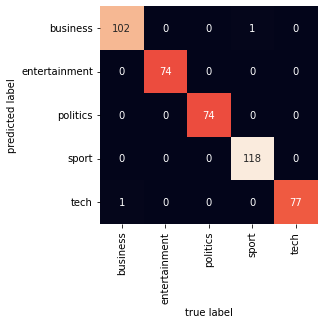

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# displaying the heat map of actual and predicted values
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=labelencoder_classes, yticklabels=labelencoder_classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [110]:
# calculating the precision, recall, f1-score category wise
report = pd.DataFrame(classification_report(y_test, ypred_gaussian_70,output_dict=True))
report

0     1     2           3          4  accuracy  \
precision    0.990291   1.0   1.0    1.000000   0.987179  0.995526   
recall       0.990291   1.0   1.0    0.991597   1.000000  0.995526   
f1-score     0.990291   1.0   1.0    0.995781   0.993548  0.995526   
support    103.000000  74.0  74.0  119.000000  77.000000  0.995526   

            macro avg  weighted avg  
precision    0.995494      0.995554  
recall       0.996378      0.995526  
f1-score     0.995924      0.995528  
support    447.000000    447.000000

In [111]:
report.rename(columns = {'0' : labelencoder_classes[0], '1' : labelencoder_classes[1], '2' : labelencoder_classes[2], '3' : labelencoder_classes[3] , '4' : labelencoder_classes[4]}, inplace=True)
report

business  entertainment  politics       sport       tech  \
precision    0.990291            1.0       1.0    1.000000   0.987179   
recall       0.990291            1.0       1.0    0.991597   1.000000   
f1-score     0.990291            1.0       1.0    0.995781   0.993548   
support    103.000000           74.0      74.0  119.000000  77.000000   

           accuracy   macro avg  weighted avg  
precision  0.995526    0.995494      0.995554  
recall     0.995526    0.996378      0.995526  
f1-score   0.995526    0.995924      0.995528  
support    0.995526  447.000000    447.000000

##5. Improving the classifier

###Experiment with different preprocessing techniques and parameters to improve the performance of the classifier( including different splits like 60-40,80-20,50-50)

In [112]:
# splitting the new dataframe df in various splits such as 80-20, 60-40, 50-50 and applying the naive bayes classifier and predicting the accuracies, recall, precision, f1-score
for i in [50,40,20] :

  print("\nDividing the trainset in",100-i,"-",i,"split\n")
  x_train, x_test, y_train, y_test = train_test_split(df.drop('category',axis=1),df['category'],test_size=i,random_state=65,shuffle=True)

  gnb.fit(x_train,y_train)
  ypred = gnb.predict(x_test) 

  acc_score = accuracy_score(y_test, ypred)
  print("Accuracy score is",acc_score)
  print("\nConfusion matrix -\n",confusion_matrix(y_test,ypred))
  print("\nClassification report -\n",pd.DataFrame(classification_report(y_test, ypred,output_dict=True)))


Dividing the trainset in 50 - 50 split

Accuracy score is 0.98

Confusion matrix -
 [[14  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  5  0  0]
 [ 1  0  0 11  0]
 [ 0  0  0  0 10]]

Classification report -
                    0    1    2          3     4  accuracy  macro avg  \
precision   0.933333  1.0  1.0   1.000000   1.0      0.98   0.986667   
recall      1.000000  1.0  1.0   0.916667   1.0      0.98   0.983333   
f1-score    0.965517  1.0  1.0   0.956522   1.0      0.98   0.984408   
support    14.000000  9.0  5.0  12.000000  10.0      0.98  50.000000   

           weighted avg  
precision      0.981333  
recall         0.980000  
f1-score       0.979910  
support       50.000000  

Dividing the trainset in 60 - 40 split

Accuracy score is 0.975

Confusion matrix -
 [[13  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  8  0]
 [ 0  0  0  0  8]]

Classification report -
                    0    1    2         3    4  accuracy  macro avg  \
precision   0.928571  1.0  1.0  1.

####Try using different types of features such as n-grams or TF-IDF weights

In [113]:
# applying the naive bayes with tf-idf weights using tfidfvectorizer instead of tf-icf weights
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(trainset['Text'])

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['category'], test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
ypred = mnb.predict(X_test)
print("accuracy: ", accuracy_score(y_test, ypred))

accuracy:  0.9552572706935123


In [114]:
# applying the naive bayes with tf-idf weights using countvectorizer instead of tf-icf weights
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

X = trainset["Text"]
y = trainset["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=30, shuffle=True)

tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train)
y_pred = mnb.predict(X_test_tf)
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.9333333333333333


##6. Conclusion



1.   The accuracies are varying when naive bayes classifer applied on the dataset(which contain tf-icf weights) splitted in different ratios such as 80-20, 70-30 etc. The best accuracy I got is 1.0 when the dataset is divided in 80-20 split.
2.   Instead of tf-icf, I applied tf-idf by using TfidVectorizer and CountVectorizer. Comparitively TfidVectorizer gave better accuracy. 
3.   As a whole, naive bayes classifier with tf-icf weighting scheme gave good accuracy as we are removing the probabilites with zero values.


TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

The GaussianNB and MultinomialNB are different variants of Naive bayes classifier. The input features in GaussianNB have gaussian distribution and can be used for both discrete and continuous values whereas the input features in the MultinomialNB follows multinomial distribution and can be used for discrete values only.